In [2]:
import requests
import pandas as pd
import numpy as np
import soilgrids

In [3]:
def get_soil_data (lat:int, lon:int):
    url=f"https://rest.isric.org/soilgrids/v2.0/properties/query?lon={lon}&lat={lat}&property=bdod&property=cec&property=cfvo&property=clay&property=nitrogen&property=ocd&property=ocs&property=phh2o&property=sand&property=silt&property=soc&depth=0-5cm&depth=0-30cm&depth=5-15cm&depth=15-30cm&depth=30-60cm&depth=60-100cm&depth=100-200cm"    
    response = requests.get(url)
    return response.json()
    

In [31]:
def process_soil_dictionary (soil:dict): 
    resp=soil['properties']['layers']
    result={}
    for feature in resp:
        for depth_range in feature['depths']:
            result [f"{feature['name']}_{depth_range['range']['top_depth']}_{depth_range['range']['bottom_depth']}"]=depth_range.get('values').get('mean',np.nan)
    result=pd.DataFrame(result, index=[0])
    return result
    


In [36]:
def return_soil_features (lat, lon):
    return process_soil_dictionary(get_soil_data(lat,lon))

In [37]:
return_soil_features (-9, -72)

,bdod_0_5,bdod_5_15,bdod_15_30,bdod_30_60,bdod_60_100,bdod_100_200,cec_0_5,cec_5_15,cec_15_30,cec_30_60,...,silt_15_30,silt_30_60,silt_60_100,silt_100_200,soc_0_5,soc_5_15,soc_15_30,soc_30_60,soc_60_100,soc_100_200
0,116,124,129,138,139,141,152,117,113,118,...,422,364,355,375,272,150,89,56,38,34


In [4]:
get_soil_data (-9, -72)

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-72.0, -9.0]},
 'properties': {'layers': [{'name': 'bdod',
    'unit_measure': {'d_factor': 100,
     'mapped_units': 'cg/cm³',
     'target_units': 'kg/dm³',
     'uncertainty_unit': ''},
    'depths': [{'range': {'top_depth': 0,
       'bottom_depth': 5,
       'unit_depth': 'cm'},
      'label': '0-5cm',
      'values': {'Q0.05': 78,
       'Q0.5': 118,
       'Q0.95': 151,
       'mean': 116,
       'uncertainty': 6}},
     {'range': {'top_depth': 5, 'bottom_depth': 15, 'unit_depth': 'cm'},
      'label': '5-15cm',
      'values': {'Q0.05': 82,
       'Q0.5': 123,
       'Q0.95': 157,
       'mean': 124,
       'uncertainty': 6}},
     {'range': {'top_depth': 15, 'bottom_depth': 30, 'unit_depth': 'cm'},
      'label': '15-30cm',
      'values': {'Q0.05': 83,
       'Q0.5': 131,
       'Q0.95': 163,
       'mean': 129,
       'uncertainty': 6}},
     {'range': {'top_depth': 30, 'bottom_depth': 60, 'unit_depth': 'cm'}

variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-179.998360809347, -55.9773009202418, 179.994461880094, 82.7192840534453)
grid_res: [0.49999003151311255, 0.38526829159357534]


Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth in Senegal')

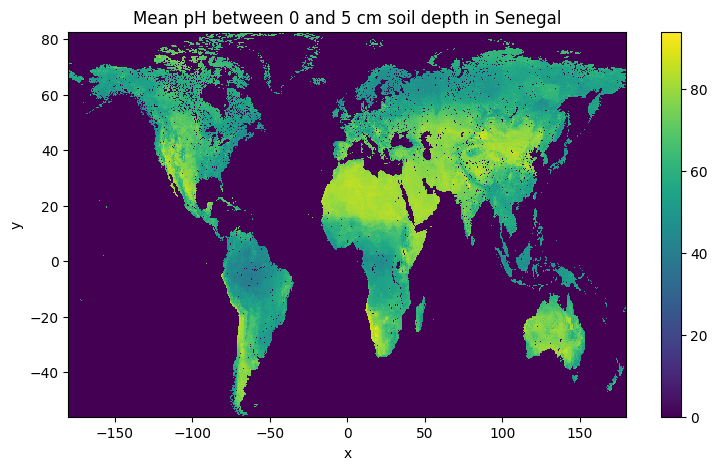

In [31]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='phh2o', coverage_id='phh2o_0-5cm_mean',
                                        width=720, height=360, west=-179.998360809347, south=-55.9773009202418, east=179.994461880094, north=82.7192840534453,
                                       crs='urn:ogc:def:crs:EPSG::4326',output='test.tif')

# show metadata
for key, value in soil_grids.metadata.items():
    print('{}: {}'.format(key,value))


# plot data
data.plot(figsize=(9,5))
plt.title('Mean pH between 0 and 5 cm soil depth in Senegal')


In [66]:
import numpy as np
unique, counts = np.unique(data.values[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 186132]
 [    36      1]
 [    37      3]
 [    38     18]
 [    39     88]
 [    40    210]
 [    41    241]
 [    42    212]
 [    43    254]
 [    44    379]
 [    45    521]
 [    46    899]
 [    47   1166]
 [    48   1240]
 [    49   1427]
 [    50   1635]
 [    51   2093]
 [    52   2478]
 [    53   2700]
 [    54   2863]
 [    55   2765]
 [    56   2723]
 [    57   2554]
 [    58   2575]
 [    59   2560]
 [    60   2512]
 [    61   2561]
 [    62   2335]
 [    63   2039]
 [    64   1786]
 [    65   1553]
 [    66   1419]
 [    67   1278]
 [    68   1337]
 [    69   1321]
 [    70   1296]
 [    71   1256]
 [    72   1230]
 [    73   1267]
 [    74   1243]
 [    75   1317]
 [    76   1537]
 [    77   1846]
 [    78   2067]
 [    79   2004]
 [    80   2137]
 [    81   2189]
 [    82   1969]
 [    83   1145]
 [    84    475]
 [    85    147]
 [    86     86]
 [    87     49]
 [    88     33]
 [    89     11]
 [    90     11]
 [    91      3]
 [    92      1]
 [    93      

In [8]:
soil_grids.get_coverage_info(service_id='phh2o', coverage_id='phh2o_0-5cm_mean')

Supported CRS: 
urn:ogc:def:crs:EPSG::152160
urn:ogc:def:crs:EPSG::4326
urn:ogc:def:crs:EPSG::3857
urn:ogc:def:crs:EPSG::54009
urn:ogc:def:crs:EPSG::54012
urn:ogc:def:crs:EPSG::152160

Coverage Bounding Box: 
EPSG:4326
(-179.998360809347, -55.9773009202418, 179.994461880094, 82.7192840534453)
EPSG:152160
(-19949750.0, -6147500.0, 19861750.0, 8361000.0)



In [90]:
data.coords['x']

<xarray.DataArray 'x' (x: 720)>
array([-179.748366, -179.248376, -178.748386, ...,  178.744487,  179.244477,
        179.744467])
Coordinates:
  * x            (x) float64 -179.7 -179.2 -178.7 -178.2 ... 178.7 179.2 179.7
    spatial_ref  int64 0